In the following task I merged the two DataFrames: store and train. Based on the 'Store' column I calculated the maximum sale value. I then extracted and displayed the store ID, date, and sales value corresponding to the maximum sale.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# a fix to increase chunk size in order to avoid exceeded cell block limit error
plt.rcParams['agg.path.chunksize'] = 10000

# 1: Find the store with the maximum sale recorded
# Read CSV files
store_df = pd.read_csv('store.csv')
train_df = pd.read_csv('train.csv')

# Merge store and train DataFrames
merged_df = train_df.merge(store_df, on='Store')

# Find Maximum Sale
max_sale_index = merged_df['Sales'].idxmax()

# Extract and Print Information
max_sale_store_id = merged_df.at[max_sale_index, 'Store']
max_sale_date = merged_df.at[max_sale_index, 'Date']
max_sale_value = merged_df.at[max_sale_index, 'Sales']

print("Task 1: Store with the maximum sale recorded")
print(f"Store ID: {max_sale_store_id}")
print(f"Date: {max_sale_date}")
print(f"Sales: {max_sale_value}\n")

/var/folders/05/ghk1t90s6pq8mmgv__lzwn1r0000gn/T/ipykernel_23796/2644837701.py:10: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train.csv')


Task 1: Store with the maximum sale recorded
Store ID: 909
Date: 2015-06-22
Sales: 41551



In the second task i read data from store DataFrame. After that I determine the store(s) with least/maximum competition distance by using min()/max() on the CompetitionDistance column.

In [23]:
# 2: Find the store(s) with the least and maximum competition distances
store_df = pd.read_csv('store.csv')

# Find the store(s) with the least competition distance
store_with_least_competition = store_df[store_df['CompetitionDistance'] == store_df['CompetitionDistance'].min()]
print("Task 2: Store(s) with the least competition distance")
print(store_with_least_competition[['Store', 'CompetitionDistance']])

# Find the store(s) with the maximum competition distance
store_with_maximum_competition = store_df[store_df['CompetitionDistance'] == store_df['CompetitionDistance'].max()]
print("\nTask 2: Store(s) with the maximum competition distance")
print(store_with_maximum_competition[['Store', 'CompetitionDistance']])

Task 2: Store(s) with the least competition distance
     Store  CompetitionDistance
515    516                 20.0

Task 2: Store(s) with the maximum competition distance
     Store  CompetitionDistance
452    453              75860.0


In the third task i look for missing values using isnull() and after that make a sum of all values that i found.

In [7]:
# 3: Check for missing values and output the number of missing values per column
missing_values = merged_df.isnull().sum()
print("\nTask 3: Number of missing values per column")
print(missing_values)


Task 3: Number of missing values per column
Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64


In the fourth task I converted the 'Date' column to a datetime format, grouped the data by month, calculated the mean sales for each month, and created a bar chart.

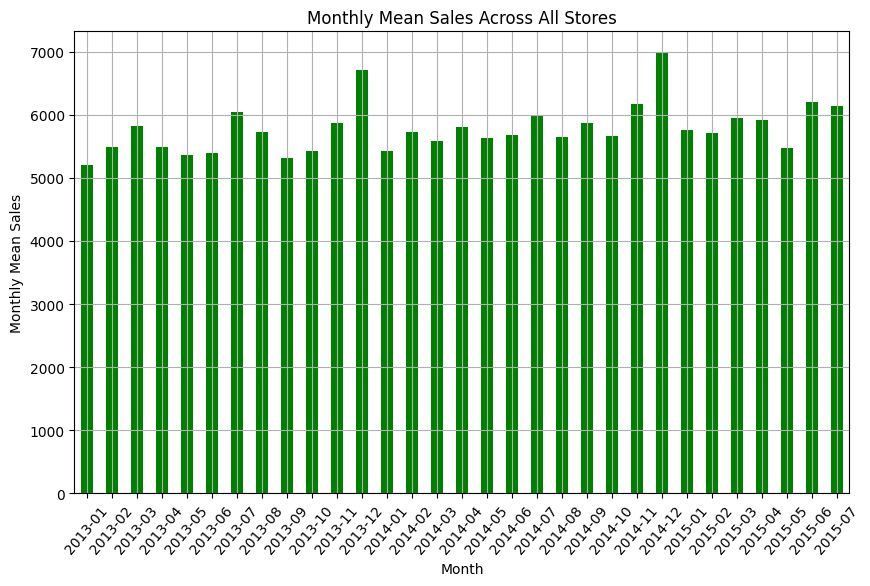

In [8]:
# 4: Plot the monthly mean of sales across all stores
# Convert the date to a datetime object
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Group by month and calculate the mean sales
monthly_mean_sales = merged_df.groupby(merged_df['Date'].dt.strftime('%Y-%m'))['Sales'].mean()

# Plot the monthly mean sales
plt.figure(figsize=(10, 6))
monthly_mean_sales.plot(kind='bar', color='green')
plt.xlabel('Month')
plt.ylabel('Monthly Mean Sales')
plt.title('Monthly Mean Sales Across All Stores')
plt.xticks(rotation=50)
plt.grid(True)

In the fifth task I grouped the data by store type, calculated the sum of sales for each store type, and identified the store type with the highest sales

In [24]:
# 5: Find which store type ('a', 'b', etc.) has had the most sales
store_type_sales = merged_df.groupby('StoreType')['Sales'].sum().idxmax()
print("\nTask 5: Store type with the most sales")
print(f"Store Type: {store_type_sales}")


Task 5: Store type with the most sales
Store Type: a


In the sixth task I calculated the mean sales separately for Promo and non-Promo days by using mean() and then computed the difference in mean sales.

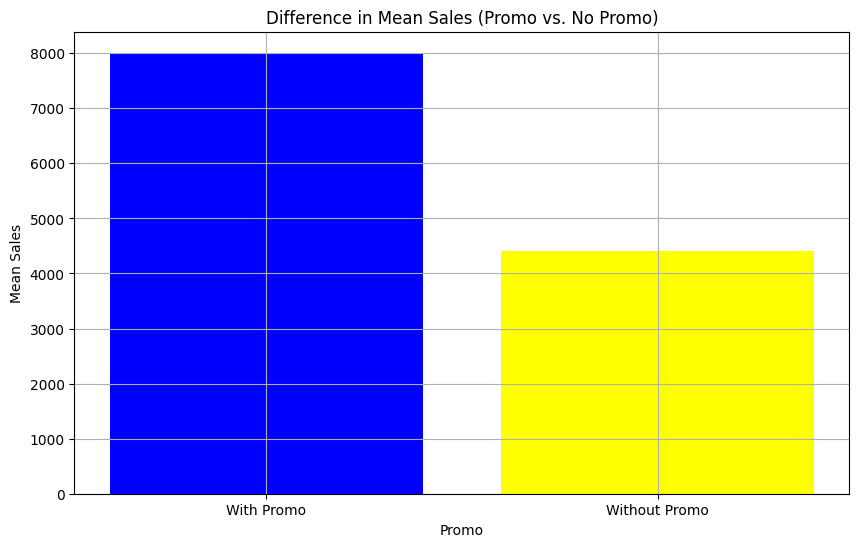

In [14]:
# 6: Calculate the difference in the mean of sales with and without Promo
mean_sales_with_promo = merged_df[merged_df['Promo'] == 1]['Sales'].mean()
mean_sales_without_promo = merged_df[merged_df['Promo'] == 0]['Sales'].mean()
difference_in_mean_sales = mean_sales_with_promo - mean_sales_without_promo

# Plot the difference in mean sales
promo_labels = ['With Promo', 'Without Promo']
promo_values = [mean_sales_with_promo, mean_sales_without_promo]
plt.figure(figsize=(10, 6))
plt.bar(promo_labels, promo_values, color=['blue', 'yellow'])
plt.xlabel('Promo')
plt.ylabel('Mean Sales')
plt.title('Difference in Mean Sales (Promo vs. No Promo)')
plt.grid(True)

In the seventh task I filtered the data for Store_ID 1, calculated the mean sales for each day of the week, and created a pie chart.

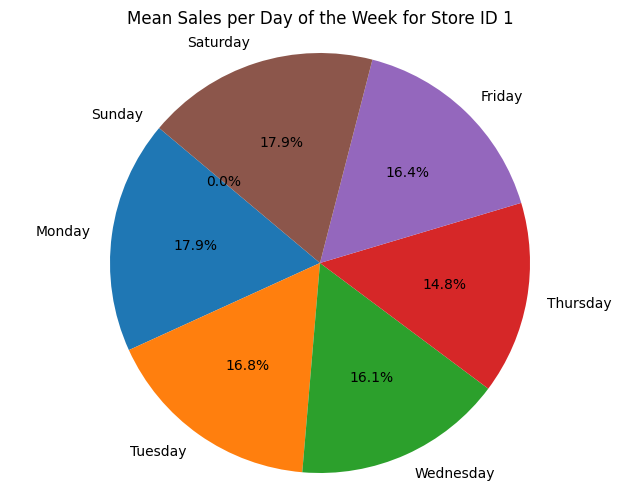

In [25]:
# 7: Plot the mean sales per day of the week for Store_ID 1 in a pie chart
store_id_1 = merged_df[merged_df['Store'] == 1]
mean_sales_per_day_store_1 = store_id_1.groupby('DayOfWeek')['Sales'].mean()
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(8, 6))
plt.pie(mean_sales_per_day_store_1, labels=day_labels, autopct='%1.1f%%', startangle=140)
plt.title('Mean Sales per Day of the Week for Store ID 1')
plt.axis('equal')
plt.grid(True)

In the eight task I calculated the mean sales for each day of the week across all stores and created a bar chart.

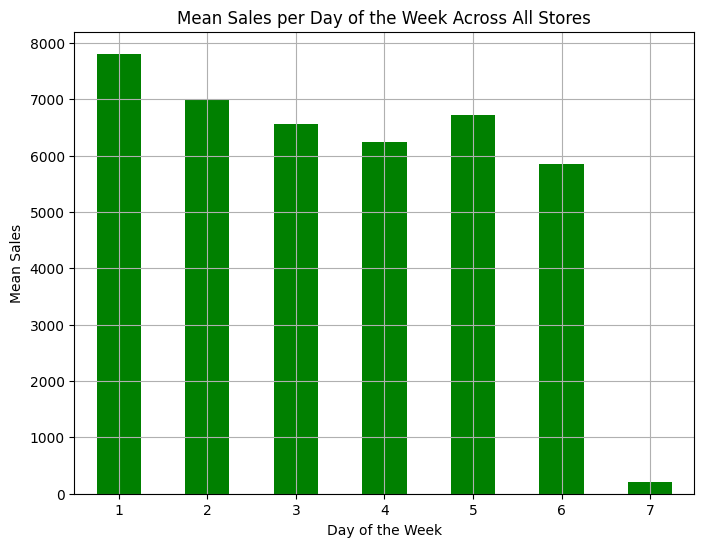

In [20]:
# 8: Plot the mean sales per day of the week across all stores
mean_sales_per_day_all_stores = merged_df.groupby('DayOfWeek')['Sales'].mean()
plt.figure(figsize=(8, 6))
mean_sales_per_day_all_stores.plot(kind='bar', color='green')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Sales')
plt.title('Mean Sales per Day of the Week Across All Stores')
plt.xticks(rotation=0)
plt.grid(True)

In the last task I isolated data for the first 10 stores, extracted their sales data, and created boxplots.

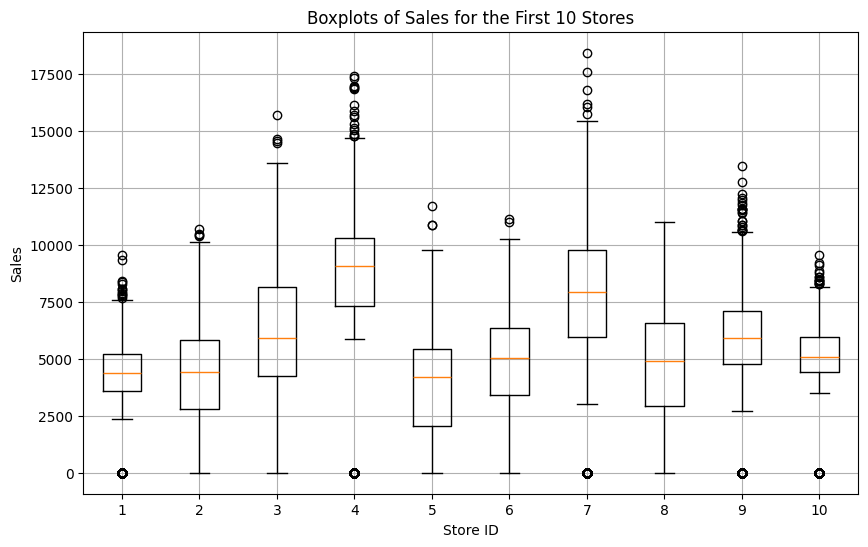

In [26]:
# Task 9: Draw boxplots of sales for the first 10 stores
first_10_store_ids = merged_df['Store'].unique()[:10]
sales_data_first_10_stores = [merged_df[merged_df['Store'] == store_id]['Sales'] for store_id in first_10_store_ids]
plt.figure(figsize=(10, 6))
plt.boxplot(sales_data_first_10_stores, labels=first_10_store_ids)
plt.xlabel('Store ID')
plt.ylabel('Sales')
plt.title('Boxplots of Sales for the First 10 Stores')
plt.grid(True)

plt.show()

P.S: I submitted my solution on ELSE without train.csv as the limit for uploading is 5mb. 